In [1]:
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
import cv2
from skimage.measure import compare_ssim as ssim

data_path = '/Users/frodo/Documents/placement/7-daydataset/'
image_mean_path = data_path + '1529453700_0_2018-06-20-01-15-00.jpg' # dark sky with nothing interesting 
image_mean = cv2.imread(image_mean_path)

scores = []
image_dict = {}

for img in os.listdir(data_path):
    image = cv2.imread(data_path + img)
    score = ssim(image_mean, image, multichannel=True)
    scores.append(score)
    image_dict.update({img : score})

In [4]:
import json
json_path = '/Users/frodo/Desktop/image_properties.json'
f = open(json_path, 'w')
loader = json.dump(image_dict, f, indent=4, separators=(',', ': '))

In [ ]:
timestamps = []
ssim_scores = []
for filename, ssim_score in image_dict.iteritems():
    ts = filename.strip('.jpg').split('_')[0]
    timestamps.append(ts)
    ssim_scores.append(ssim_score)

In [4]:
import os
img_list = []
data_path = '/Users/frodo/Documents/placement/7-daydataset/'
for img in os.listdir(data_path):
    img_list.append(img)

In [140]:
from astral import Astral
import datetime as dt
from pytz import timezone
import pytz, shutil

DATE_FMT = "%Y-%m-%d-%H-%M-%S"
bst = pytz.timezone('Europe/London')

city_name = 'London'
a = Astral()
a.solar_depression = 'civil'

city = a[city_name]

for img in os.listdir(data_path):
    year = img.split('_')[2].split('-')[0]
    month = img.split('-')[1]
    day = img.split('-')[2]
    img_date = dt.date(int(year), int(month), int(day))
    
    sun = city.sun(date=img_date, local=True)
    ts = img.split('_')[2].strip('.jpg')

    timestamp_unaware = dt.datetime.strptime(ts, DATE_FMT)
    timestamp = bst.localize(timestamp_unaware)
    
    if sun['dawn'] < timestamp < sun['sunrise'] or\
    sun['sunset'] < timestamp < sun['dusk']:
        shutil.copy(data_path + img,'/Users/frodo/Desktop/sunrise-sunset/')


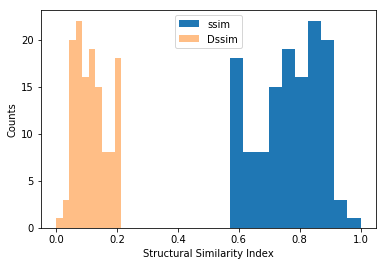

In [143]:
import cv2
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt

# image_mean_path = data_path + '1529453700_0_2018-06-20-01-15-00.jpg'
image_mean_path = data_path + '1529292900_0_2018-06-18-04-35-00.jpg'
image_mean = cv2.imread(image_mean_path)
sunset_path = '/Users/frodo/Desktop/sunrise-sunset/'

scores = []

for img in os.listdir(sunset_path):
    image = cv2.imread(sunset_path + img)
    score = ssim(image_mean, image, multichannel=True)
    dssim = (1 - score) / 2.
    scores.append(score)    

plt.hist(scores, label='ssim')
plt.hist(dssim_scores, label='Dssim', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Structural Similarity Index')
plt.ylabel('Counts')
plt.savefig('/Users/frodo/Desktop/ssim_sunset.png')